In [ ]:
Afrom google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Kaggle 팀 과제/집 가격 예측(회귀)'
path = '/content/gdrive/MyDrive/Kaggle 팀 과제/집 가격 예측(회귀)'
!ls

/content/gdrive/.shortcut-targets-by-id/1EoJgFet78Cqka5-cEF0_OIL7aL7xQ5KB/Kaggle 팀 과제/집 가격 예측(회귀)
'220729 초안 0.1.ipynb'			    PER_FLOOR.csv
'220730 nearest_sch_ranking_정리.ipynb'     polynomial2.csv
'220730 nearest_sch_ranking.ipynb'	    polynomial3.csv
'220730 nearest_sch_ranking.ipynb의 사본'   polynomial4.csv
 주영2.csv				    polynomial5.csv
 CATBOOST2.csv				    polynomial.csv
 CATBOOST3.csv				    POSTCODE.csv
 CATBOOST.csv				    PRESOLD_AFTER.csv
 catboost_info				    PRESOLD.csv
 Category.csv				    rank2.csv
 주영.csv				    rank.csv
 DATE_SOLD2.csv				    rank+garage2.csv
 DATE_SOLD3.csv				    rank+garage.csv
 DATE_SOLD4.csv				    regression220718.zip
 DATE_SOLD.csv				    remove_NEAREST_SCH_DIST.csv
 garage2.csv				    sample_submission.csv
 garage.csv				    SCH_RANK_LABEL_ENCODER2.csv
 garage_outlier.csv			    SCH_RANK_LABEL_ENCODER3.csv
 gpu_test2.csv				    SCH_RANK_LABEL_ENCODER4.csv
 gpu_test3.csv				    SCH_RANK_LABEL_ENCODER.csv
 gpu_test4.csv			

In [ ]:
!unzip -o -qq regression220718.zip

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
test_id_idx = sample_submission['ID']

In [ ]:
test_id_idx

0        18510
1        18511
2        18512
3        18513
4        18514
         ...  
15141    33651
15142    33652
15143    33653
15144    33654
15145    33655
Name: ID, Length: 15146, dtype: int64

In [ ]:
len_train_df = len(train_df)
len_test_df = len(test_df)

In [ ]:
test_df.describe()

,ID,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,15146.000000,15146.000000,15146.000000,14035.000000,15146.000000,15146.000000,13719.000000,15146.000000,15146.000000,15146.000000,15146.000000,15146.000000,15146.000000,10194.000000
mean,26082.500000,3.657005,1.820085,2.200071,2631.965932,183.499604,1989.585465,19672.671861,4502.303579,6089.188036,-31.960525,115.879532,1.806130,72.654797
std,4372.417924,0.750092,0.599148,1.281082,12502.508734,71.956342,20.916498,11378.218527,4445.988999,62.315689,0.176970,0.118044,1.706987,40.765334
min,18510.000000,1.000000,1.000000,1.000000,71.000000,1.000000,1870.000000,693.000000,46.000000,6003.000000,-32.455550,115.582730,0.082859,1.000000
25%,22296.250000,3.000000,1.000000,2.000000,506.000000,130.000000,1978.000000,11000.000000,1800.000000,6050.000000,-32.066644,115.790371,0.883228,39.000000
50%,26082.500000,4.000000,2.000000,2.000000,683.000000,173.000000,1995.000000,17300.000000,3200.000000,6069.000000,-31.932300,115.854480,1.339595,68.000000
75%,29868.750000,4.000000,2.000000,2.000000,840.000000,223.000000,2005.000000,26600.000000,5300.000000,6149.000000,-31.844574,115.970039,2.100188,105.000000
max,33655.000000,9.000000,16.000000,50.000000,455212.000000,840.000000,2017.000000,58700.000000,34300.000000,6558.000000,-31.457450,116.343201,19.142508,139.000000


In [ ]:
train_df['GARAGE'].fillna(0, inplace = True)

In [ ]:
test_df['GARAGE'].fillna(0, inplace = True)

In [ ]:
train_df[['SOLD_MONTH', 'SOLD_YEAR']] = train_df['DATE_SOLD'].str.split('-', 1, expand=True).astype('float64')
train_df.drop(['DATE_SOLD'],axis=1,inplace=True)

In [ ]:
test_df[['SOLD_MONTH', 'SOLD_YEAR']] = test_df['DATE_SOLD'].str.split('-', 1, expand=True).astype('float64')
test_df.drop(['DATE_SOLD'],axis=1,inplace=True)

In [ ]:
import math
train_df = math.log(train_df)

TypeError: ignored

In [ ]:
train_df['PRESOLD'] = train_df['SOLD_YEAR'].astype('int') < train_df['BUILD_YEAR']

In [ ]:
test_df['PRESOLD'] = test_df['SOLD_YEAR'].astype('int') < test_df['BUILD_YEAR']

In [ ]:
train_df['PRESOLD'] = train_df['SOLD_YEAR'].astype('int') > train_df['BUILD_YEAR']

In [ ]:
test_df['PRESOLD'] = test_df['SOLD_YEAR'].astype('int') > test_df['BUILD_YEAR']

In [ ]:
# train_df['ROOM_PER_FLOOR'] = train_df['FLOOR_AREA'] / (train_df['BEDROOMS'] + train_df['BATHROOMS'] + train_df['GARAGE'])

In [ ]:
# test_df['ROOM_PER_FLOOR'] = test_df['FLOOR_AREA'] / (test_df['BEDROOMS'] + test_df['BATHROOMS'] + test_df['GARAGE'])

In [ ]:
# train_df['ROOM_PER_FLOOR']

In [ ]:
# train_df['NEAREST_SCH_DIST'][train_df['NEAREST_SCH_DIST'] > 10.5] = 10.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# test_df['NEAREST_SCH_DIST'][test_df['NEAREST_SCH_DIST'] > 10.5] = 10.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# train_df['SMLLAND'] = train_df['LAND_AREA'] < 1200

In [ ]:
# train_df['BIGLAND'] = train_df['LAND_AREA'] >= 1200

In [ ]:
# test_df['SMLLAND'] = test_df['LAND_AREA'] < 1200

In [ ]:
# test_df['BIGLAND'] = test_df['LAND_AREA'] >= 1200

In [ ]:
# train_df['Is_Midland Station'] = train_df['NEAREST_STN'] == 'Midland Station'

In [ ]:
# test_df['Is_Midland Station'] = test_df['NEAREST_STN'] == 'Midland Station'

In [ ]:
train_df.drop(['ID', 'ADDRESS', 'SUBURB', 'SOLD_MONTH', 'NEAREST_SCH'], axis = 1, inplace = True)

In [ ]:
# train_df[train_df['LAND_AREA'] > 800000]

,ID,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,...,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,SOLD_MONTH,SOLD_YEAR,PRESOLD
4115,4115,60 Semerwater Crescent,Aveley,365000,4,2,2.0,999999,172,2015.0,...,11000,6069,-31.790640,115.998892,SWAN VALLEY ANGLICAN COMMUNITY SCHOOL,1.335798,53.0,6.0,2020.0,False
11523,11523,11 Semerwater Crescent,Aveley,375000,4,2,2.0,999999,175,2016.0,...,11000,6069,-31.789232,115.999298,SWAN VALLEY ANGLICAN COMMUNITY SCHOOL,1.427274,53.0,5.0,2018.0,False
12373,12373,3 Longstaff Avenue,Alkimos,545000,4,2,2.0,983690,216,2015.0,...,1300,6038,-31.626927,115.691071,BUTLER COLLEGE,3.218389,39.0,12.0,2019.0,False
14806,14806,12 Gailey Way,Aveley,385000,3,2,2.0,999999,140,2015.0,...,11300,6069,-31.789982,115.998233,SWAN VALLEY ANGLICAN COMMUNITY SCHOOL,1.302166,53.0,9.0,2020.0,False


In [ ]:
# train_df.loc[4115,'LAND_AREA'] = 375 # m^2
# train_df.loc[14806,'LAND_AREA'] = 375
# train_df.loc[12373,'LAND_AREA'] = 574 
# train_df.loc[11523,'LAND_AREA'] = 375 # m^2

In [ ]:
# train_df.loc[4115]

ID                                                   4115
ADDRESS                            60 Semerwater Crescent
SUBURB                                             Aveley
PRICE                                              365000
BEDROOMS                                                4
BATHROOMS                                               2
GARAGE                                                2.0
LAND_AREA                                             375
FLOOR_AREA                                            172
BUILD_YEAR                                         2015.0
CBD_DIST                                            21400
NEAREST_STN                            Woodbridge Station
NEAREST_STN_DIST                                    11000
POSTCODE                                             6069
LATITUDE                                        -31.79064
LONGITUDE                                      115.998892
NEAREST_SCH         SWAN VALLEY ANGLICAN COMMUNITY SCHOOL
NEAREST_SCH_DI

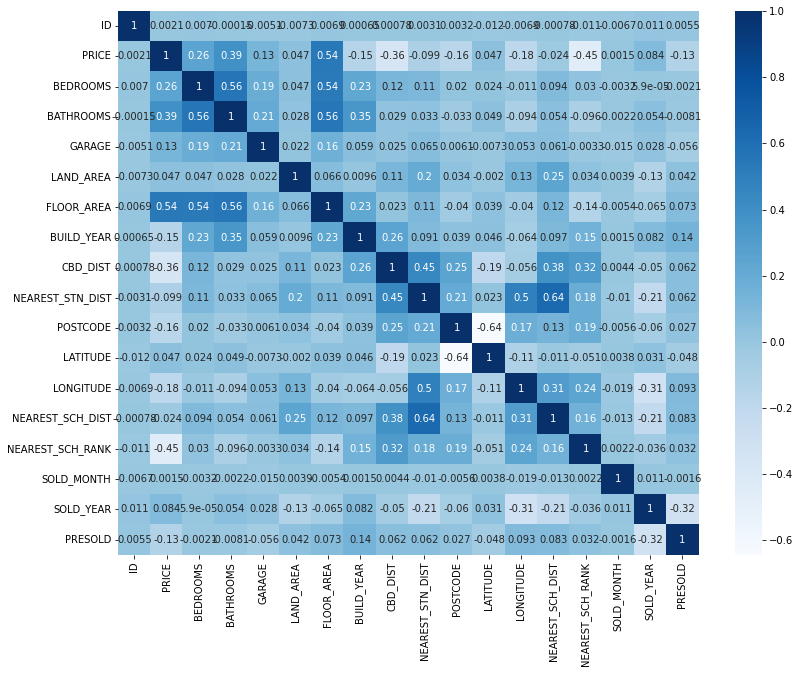

In [ ]:
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df.corr(),annot=True,cmap="Blues")

In [ ]:
# train_df['new_feature'] = train_df['POSTCODE'].div(train_df['LATITUDE'])

In [ ]:
# train_df['new_feature'] = train_df['NEAREST_STN_DIST'].div(test_df['NEAREST_SCH_DIST'])

In [ ]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["PRICE"])>=0.01]
top_corr_features

Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'SOLD_YEAR',
       'PRESOLD'],
      dtype='object')

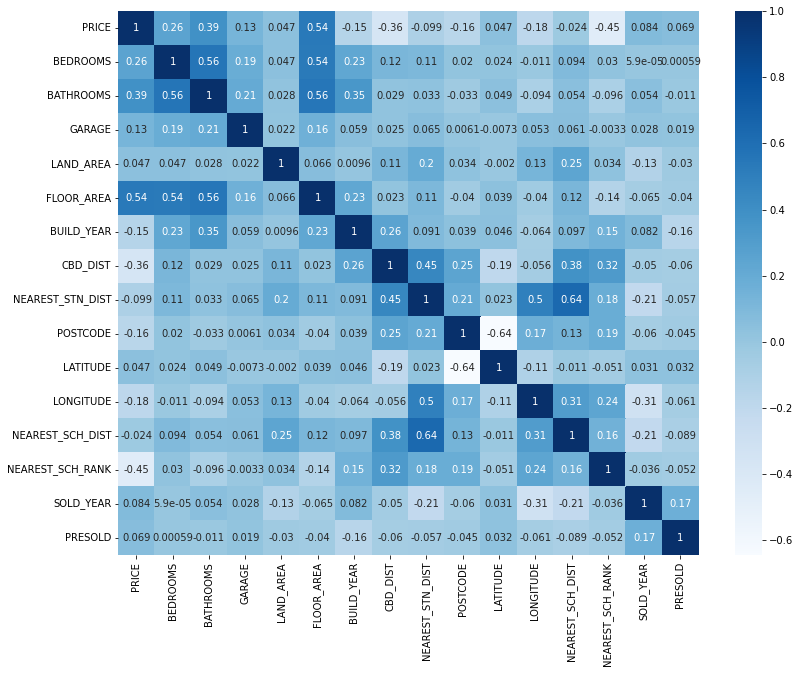

In [ ]:
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="Blues")

In [ ]:
# feature selection
train_df = train_df[top_corr_features]
test_df = test_df[train_df.columns.drop(['PRICE'])]

In [ ]:
test_df = test_df[train_df.columns.drop(['PRICE'])]

In [ ]:
train_y_label = train_df['PRICE'] 	# target 값을 미리 분리하였음.
train_df.drop(['PRICE'], axis=1, inplace=True)

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(eta = 0.1, n_estimators = 650, colsample_bylevel = 0.7, colsample_bytree = 0.7, max_depth = 5, seed = 42)
model_xgb.fit(train_df, train_y_label)

[10:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bylevel=0.7, colsample_bytree=0.7, eta=0.1, max_depth=5,
             n_estimators=650, seed=42)

In [ ]:
importance = model_xgb.feature_importances_

In [ ]:
importances = pd.DataFrame()

In [ ]:
importances['feature'] = train_df.columns
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

,feature,importances
0,NEAREST_SCH_RANK,0.196100
1,PRESOLD,0.122488
2,BATHROOMS,0.107791
3,POSTCODE,0.103984
4,SMLLAND,0.077898
5,FLOOR_AREA,0.072219
6,BIGLAND,0.069498
7,BEDROOMS,0.051780
8,CBD_DIST,0.050108
9,SOLD_YEAR,0.035742


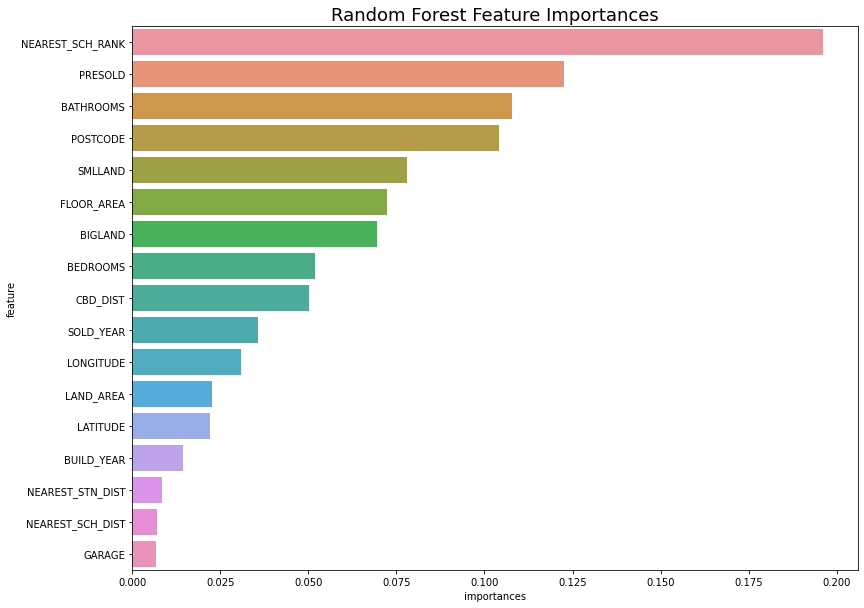

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot(x='importances', y='feature', data= importances)
plt.title('Random Forest Feature Importances', fontsize=18)
plt.show()

In [ ]:
# train_df = train_df.drop(['NEAREST_SCH_DIST'], axis = 1)
# test_df = test_df.drop(['NEAREST_SCH_DIST'], axis = 1)

In [ ]:
# train_df = train_df[train_df['POSTCODE'] < 6200]

In [ ]:
boston_df = pd.concat((train_df, test_df), axis=0)
boston_df_index = boston_df.index

print('Length of Boston Dataset : ',len(boston_df))
boston_df.head()

Length of Boston Dataset :  33656


,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,SOLD_YEAR,PRESOLD
0,5,2,4.0,674,266,2007.0,35500,3000,6030,-31.656206,115.720566,1.079230,120.0,2015.0,True
1,5,4,2.0,540,301,2014.0,16900,8100,6065,-31.800802,115.867675,0.667585,NaN,2018.0,True
2,4,2,2.0,781,220,1992.0,33500,3500,6030,-31.682040,115.702600,0.650761,111.0,2020.0,True
3,2,1,2.0,425,185,1938.0,3500,1500,6016,-31.926046,115.838181,0.484465,106.0,2020.0,True
4,3,2,2.0,546,186,2004.0,12900,800,6159,-32.032079,115.759626,1.869050,25.0,2017.0,True


In [ ]:
# check null 
check_null = boston_df.isna().sum() / len(boston_df)

# columns of null ratio >= 0.5
check_null[check_null >= 0.0]

BEDROOMS            0.000000
BATHROOMS           0.000000
GARAGE              0.000000
LAND_AREA           0.000000
FLOOR_AREA          0.000000
BUILD_YEAR          0.093743
CBD_DIST            0.000000
NEAREST_STN_DIST    0.000000
POSTCODE            0.000000
LATITUDE            0.000000
LONGITUDE           0.000000
NEAREST_SCH_DIST    0.000000
NEAREST_SCH_RANK    0.325410
SOLD_YEAR           0.000000
PRESOLD             0.000000
dtype: float64

In [ ]:
# split object & numeric
boston_obj_df = boston_df.select_dtypes(include='object')	# 카테고리형
boston_num_df = boston_df.select_dtypes(exclude='object')	# 수치형

In [ ]:
print('Object type columns:\n',boston_obj_df.columns)
print('---------------------------------------------------------------------------------')
print('Numeric type columns:\n',boston_num_df.columns)

Object type columns:
 Index([], dtype='object')
---------------------------------------------------------------------------------
Numeric type columns:
 Index(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'SOLD_YEAR',
       'PRESOLD'],
      dtype='object')


In [ ]:
# boston_dummy_df = pd.get_dummies(boston_obj_df, drop_first=True)
# boston_dummy_df.index = boston_df_index
# boston_dummy_df.head()
# boston_dummy_df = pd.DataFrame()

# from sklearn.preprocessing import LabelEncoder
# for col in boston_obj_df.columns:
#     le = LabelEncoder()
#     le.fit(boston_obj_df[col])
#     boston_dummy_df[col] = le.transform(boston_obj_df[col])


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(boston_num_df)
boston_num_df_ = imputer.transform(boston_num_df)
boston_num_df = pd.DataFrame(boston_num_df_, columns=boston_num_df.columns, index=boston_df_index )
boston_num_df.head()

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,SOLD_YEAR,PRESOLD
0,5.0,2.0,4.0,674.0,266.0,2007.0,35500.0,3000.0,6030.0,-31.656206,115.720566,1.079230,120.000000,2015.0,1.0
1,5.0,4.0,2.0,540.0,301.0,2014.0,16900.0,8100.0,6065.0,-31.800802,115.867675,0.667585,72.672569,2018.0,1.0
2,4.0,2.0,2.0,781.0,220.0,1992.0,33500.0,3500.0,6030.0,-31.682040,115.702600,0.650761,111.000000,2020.0,1.0
3,2.0,1.0,2.0,425.0,185.0,1938.0,3500.0,1500.0,6016.0,-31.926046,115.838181,0.484465,106.000000,2020.0,1.0
4,3.0,2.0,2.0,546.0,186.0,2004.0,12900.0,800.0,6159.0,-32.032079,115.759626,1.869050,25.000000,2017.0,1.0


In [ ]:
boston_df = pd.concat([boston_obj_df, boston_num_df], axis = 1)
boston_df

,ADDRESS,SUBURB,NEAREST_STN,NEAREST_SCH,ID,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,...,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,SOLD_MONTH,SOLD_YEAR,PRESOLD
0,9 Crumlin Way,Ridgewood,Butler Station,IRENE MCCORMACK CATHOLIC COLLEGE,0.0,5.0,2.0,4.0,674.0,266.0,...,35500.0,3000.0,6030.0,-31.656206,115.720566,1.079230,120.000000,9.0,2015.0,0.0
1,37 Sissinghurst Crescent,Landsdale,Whitfords Station,LANDSDALE CHRISTIAN SCHOOL,1.0,5.0,4.0,2.0,540.0,301.0,...,16900.0,8100.0,6065.0,-31.800802,115.867675,0.667585,72.672569,7.0,2018.0,0.0
2,24 Tees Court,Mindarie,Clarkson Station,MINDARIE SENIOR COLLEGE,2.0,4.0,2.0,2.0,781.0,220.0,...,33500.0,3500.0,6030.0,-31.682040,115.702600,0.650761,111.000000,2.0,2020.0,0.0
3,31 Brentham Street,Mount Hawthorn,Leederville Station,ARANMORE CATHOLIC COLLEGE,3.0,2.0,1.0,2.0,425.0,185.0,...,3500.0,1500.0,6016.0,-31.926046,115.838181,0.484465,106.000000,7.0,2020.0,0.0
4,46/1 Corkhill Street,North Fremantle,North Fremantle Station,JOHN CURTIN COLLEGE OF THE ARTS,4.0,3.0,2.0,2.0,546.0,186.0,...,12900.0,800.0,6159.0,-32.032079,115.759626,1.869050,25.000000,10.0,2017.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,2 Danehill Place,Balga,Warwick Station,BALGA SENIOR HIGH SCHOOL,33651.0,3.0,1.0,0.0,801.0,108.0,...,10800.0,3900.0,6061.0,-31.857800,115.834370,1.352896,72.672569,4.0,2018.0,0.0
15142,19 Hester Street,Langford,Thornlie Station,COMMUNICARE ACADEMY,33652.0,4.0,2.0,2.0,530.0,158.0,...,13100.0,854.0,6147.0,-32.039400,115.951670,1.526169,72.672569,11.0,2018.0,0.0
15143,43 Hale Street,Watermans Bay,Warwick Station,CARINE SENIOR HIGH SCHOOL,33653.0,3.0,2.0,2.0,1072.0,148.0,...,14700.0,3800.0,6020.0,-31.852980,115.757010,1.779797,47.000000,2.0,2015.0,0.0
15144,980 Bushlands Road,Hovea,Midland Station,HELENA COLLEGE,33654.0,5.0,3.0,2.0,19996.0,396.0,...,24900.0,10200.0,6071.0,-31.878930,116.107640,3.523922,78.000000,9.0,2012.0,0.0


In [ ]:
# feature selection
# boston_df = boston_df[top_corr_features]

In [ ]:
boston_df = boston_num_df
boston_df.head()

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,SOLD_YEAR,PRESOLD
0,5.0,2.0,4.0,674.0,266.0,2007.0,35500.0,3000.0,6030.0,-31.656206,115.720566,1.079230,120.000000,2015.0,0.0
1,5.0,4.0,2.0,540.0,301.0,2014.0,16900.0,8100.0,6065.0,-31.800802,115.867675,0.667585,72.672569,2018.0,0.0
2,4.0,2.0,2.0,781.0,220.0,1992.0,33500.0,3500.0,6030.0,-31.682040,115.702600,0.650761,111.000000,2020.0,0.0
3,2.0,1.0,2.0,425.0,185.0,1938.0,3500.0,1500.0,6016.0,-31.926046,115.838181,0.484465,106.000000,2020.0,0.0
4,3.0,2.0,2.0,546.0,186.0,2004.0,12900.0,800.0,6159.0,-32.032079,115.759626,1.869050,25.000000,2017.0,0.0


In [ ]:
square_df = boston_num_df ** 2

In [ ]:
square_df.drop(['PRESOLD'], axis = 1, inplace = True)

In [ ]:
square_df.columns = ['BEDROOMS2', 'BATHROOMS2', 'GARAGE2', 'LAND_AREA2', 'FLOOR_AREA2',
       'BUILD_YEAR2', 'CBD_DIST2', 'NEAREST_STN_DIST2', 'POSTCODE2', 'LATITUDE2',
       'LONGITUDE2', 'NEAREST_SCH_DIST2', 'NEAREST_SCH_RANK2', 'SOLD_YEAR2']

In [ ]:
triple_df = boston_num_df ** 3
triple_df.drop(['PRESOLD'], axis = 1, inplace = True)

In [ ]:
triple_df.columns = ['BEDROOMS3', 'BATHROOMS3', 'GARAGE3', 'LAND_AREA3', 'FLOOR_AREA3',
       'BUILD_YEAR3', 'CBD_DIST3', 'NEAREST_STN_DIST3', 'POSTCODE3', 'LATITUDE3',
       'LONGITUDE3', 'NEAREST_SCH_DIST3', 'NEAREST_SCH_RANK3', 'SOLD_YEAR3']

In [ ]:
# quadra_df = boston_num_df ** 4
# quadra_df.drop(['PRESOLD', 'SMLLAND', 'BIGLAND'], axis = 1, inplace = True)

In [ ]:
# quadra_df.columns = ['BEDROOMS4', 'BATHROOMS4', 'GARAGE4', 'LAND_AREA4', 'FLOOR_AREA4',
#        'BUILD_YEAR4', 'CBD_DIST4', 'NEAREST_STN_DIST4', 'POSTCODE4', 'LATITUDE4',
#        'LONGITUDE4', 'NEAREST_SCH_DIST4', 'NEAREST_SCH_RANK4', 'SOLD_YEAR4']

In [ ]:
# boston_df = pd.concat([boston_num_df, square_df], axis = 1)

In [ ]:
boston_num_df = pd.concat([boston_num_df, square_df, triple_df], axis = 1)

In [ ]:
boston_df = pd.concat([boston_obj_df, boston_num_df], axis = 1)

In [ ]:
boston_df

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,...,FLOOR_AREA3,BUILD_YEAR3,CBD_DIST3,NEAREST_STN_DIST3,POSTCODE3,LATITUDE3,LONGITUDE3,NEAREST_SCH_DIST3,NEAREST_SCH_RANK3,SOLD_YEAR3
0,5.0,2.0,4.0,674.0,266.0,2007.0,35500.0,3000.0,6030.0,-31.656206,...,18821096.0,8.084294e+09,4.473888e+13,2.700000e+10,2.192562e+11,-31723.170852,1.549643e+06,1.257020,1.728000e+06,8.181353e+09
1,5.0,4.0,2.0,540.0,301.0,2014.0,16900.0,8100.0,6065.0,-31.800802,...,27270901.0,8.169179e+09,4.826809e+12,5.314410e+11,2.230963e+11,-32159.866136,1.555560e+06,0.297522,3.838058e+05,8.217950e+09
2,4.0,2.0,2.0,781.0,220.0,1992.0,33500.0,3500.0,6030.0,-31.682040,...,10648000.0,7.904383e+09,3.759538e+13,4.287500e+10,2.192562e+11,-31800.900197,1.548921e+06,0.275591,1.367631e+06,8.242408e+09
3,2.0,1.0,2.0,425.0,185.0,1938.0,3500.0,1500.0,6016.0,-31.926046,...,6331625.0,7.278826e+09,4.287500e+10,3.375000e+09,2.177326e+11,-32541.336727,1.554373e+06,0.113707,1.191016e+06,8.242408e+09
4,3.0,2.0,2.0,546.0,186.0,2004.0,12900.0,800.0,6159.0,-32.032079,...,6434856.0,8.048096e+09,2.146689e+12,5.120000e+08,2.336311e+11,-32866.644403,1.551213e+06,6.529243,1.562500e+04,8.205739e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,3.0,1.0,0.0,801.0,108.0,1996.0,10800.0,3900.0,6061.0,-31.857800,...,1259712.0,7.952096e+09,1.259712e+12,5.931900e+10,2.226552e+11,-32333.099925,1.554219e+06,2.476244,3.838058e+05,8.217950e+09
15142,4.0,2.0,2.0,530.0,158.0,1998.0,13100.0,854.0,6147.0,-32.039400,...,3944312.0,7.976024e+09,2.248091e+12,6.228359e+08,2.322681e+11,-32889.185888,1.558946e+06,3.554737,3.838058e+05,8.217950e+09
15143,3.0,2.0,2.0,1072.0,148.0,1950.0,14700.0,3800.0,6020.0,-31.852980,...,3241792.0,7.414875e+09,3.176523e+12,5.487200e+10,2.181672e+11,-32318.426411,1.551108e+06,5.637822,1.038230e+05,8.181353e+09
15144,5.0,3.0,2.0,19996.0,396.0,1990.0,24900.0,10200.0,6071.0,-31.878930,...,62099136.0,7.880599e+09,1.543825e+13,1.061208e+12,2.237591e+11,-32397.478348,1.565245e+06,43.760149,4.745520e+05,8.144866e+09


In [ ]:
train_df = boston_df[:-len_test_df]
test_df = boston_df[-len_test_df:]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
train_dummy_df = ohe.fit_transform(train_df[['NEAREST_STN']])
train_dummy_df = pd.DataFrame(train_dummy_df, columns=['NEAREST_STN_' + col for col in ohe.categories_[0]])

KeyError: ignored

In [ ]:
train_dummy_df

,NEAREST_STN_Armadale Station,NEAREST_STN_Ashfield Station,NEAREST_STN_Bassendean Station,NEAREST_STN_Bayswater Station,NEAREST_STN_Beckenham Station,NEAREST_STN_Belmont Park Station,NEAREST_STN_Bull Creek Station,NEAREST_STN_Burswood Station,NEAREST_STN_Butler Station,NEAREST_STN_Canning,...,NEAREST_STN_Swanbourne Station,NEAREST_STN_Thornlie Station,NEAREST_STN_Vic,NEAREST_STN_Warnbro Station,NEAREST_STN_Warwick Station,NEAREST_STN_Wellard Station,NEAREST_STN_Welshpool Station,NEAREST_STN_West Leederville Station,NEAREST_STN_Whitfords Station,NEAREST_STN_Woodbridge Station
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18507,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_dummy_df = ohe.transform(test_df[['NEAREST_STN']])
test_dummy_df = pd.DataFrame(test_dummy_df, columns=['NEAREST_STN_' + col for col in ohe.categories_[0]])

In [ ]:
train_df = pd.merge(train_df, train_dummy_df, left_index = True, right_index = True)

In [ ]:
test_df = pd.merge(test_df, test_dummy_df, left_index = True, right_index = True)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# std_scaler.fit(train_df)
# train_df = std_scaler.transform(train_df)
# train_df = pd.DataFrame(train_df, columns = boston_df.columns)

# std_scaler.fit(test_df)
# test_df = std_scaler.transform(test_df)
# test_df = pd.DataFrame(test_df, columns = boston_df.columns)

train_df['PRICE'] = train_y_label

print('train set length: ',len(train_df))
print('test set length: ',len(test_df))


from sklearn.model_selection import train_test_split

X_train = train_df.drop(['PRICE'], axis=1)
y_train = train_df['PRICE']

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state = 42)

X_test = test_df

train set length:  18510
test set length:  15146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False) # 기본 다항식형태를 만들고
x_poly = poly_features.fit_transform(X_train)

In [ ]:
x_poly

In [ ]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["PRICE"])>=0.01]
top_corr_features

Index(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       ...
       'NEAREST_STN_Swanbourne Station', 'NEAREST_STN_Thornlie Station',
       'NEAREST_STN_Vic', 'NEAREST_STN_Warnbro Station',
       'NEAREST_STN_Warwick Station', 'NEAREST_STN_Wellard Station',
       'NEAREST_STN_Welshpool Station', 'NEAREST_STN_West Leederville Station',
       'NEAREST_STN_Woodbridge Station', 'PRICE'],
      dtype='object', length=103)

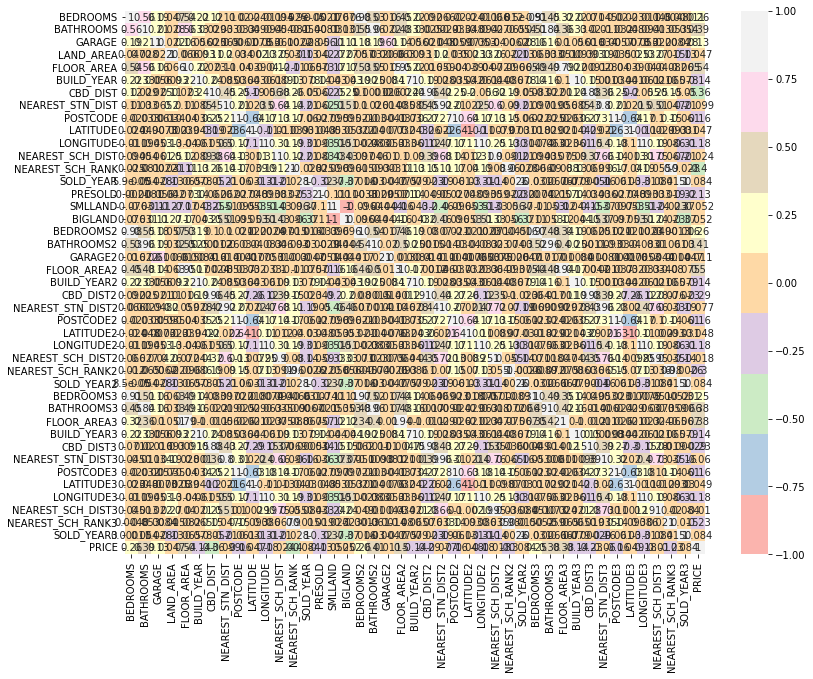

In [ ]:
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="Pastel1")

In [ ]:
# feature selection
train_df = train_df[top_corr_features]
test_df = test_df[train_df.columns.drop(['PRICE'])]

In [ ]:
X_train = train_df.drop(['PRICE'], axis=1)
y_train = train_df['PRICE']

In [ ]:
train_y_label = train_df['PRICE'] 	# target 값을 미리 분리하였음.
train_df.drop(['PRICE'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print('X_train : ',len(X_train))
# print('X_val : ',len(X_val))
print('X_test :',len(X_test))

X_train :  18510
X_test : 15146


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
X_train.drop(['NEAREST_STN'], axis = 1, inplace = True)

In [ ]:
X_train

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,...,NEAREST_STN_Swanbourne Station,NEAREST_STN_Thornlie Station,NEAREST_STN_Vic,NEAREST_STN_Warnbro Station,NEAREST_STN_Warwick Station,NEAREST_STN_Wellard Station,NEAREST_STN_Welshpool Station,NEAREST_STN_West Leederville Station,NEAREST_STN_Whitfords Station,NEAREST_STN_Woodbridge Station
0,5.0,2.0,4.0,674.0,266.0,2007.0,35500.0,3000.0,6030.0,-31.656206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,4.0,2.0,540.0,301.0,2014.0,16900.0,8100.0,6065.0,-31.800802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.0,2.0,2.0,781.0,220.0,1992.0,33500.0,3500.0,6030.0,-31.682040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,2.0,425.0,185.0,1938.0,3500.0,1500.0,6016.0,-31.926046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.0,2.0,546.0,186.0,2004.0,12900.0,800.0,6159.0,-32.032079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,4.0,2.0,2.0,533.0,198.0,2007.0,21200.0,4400.0,6065.0,-31.764187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18506,3.0,2.0,2.0,344.0,237.0,2010.0,22100.0,1900.0,6111.0,-32.114990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18507,3.0,1.0,1.0,1016.0,110.0,1953.0,8900.0,3100.0,6104.0,-31.931320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18508,4.0,2.0,2.0,718.0,176.0,1988.0,14600.0,5400.0,6163.0,-32.070861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()
model.fit(X_train, y_train)

Learning rate set to 0.064928
0:	learn: 340022.7229284	total: 14.1ms	remaining: 14s
1:	learn: 328940.3385737	total: 26.2ms	remaining: 13.1s
2:	learn: 317908.4527041	total: 37.8ms	remaining: 12.6s
3:	learn: 307602.4972192	total: 49.2ms	remaining: 12.2s
4:	learn: 297983.0284023	total: 61.1ms	remaining: 12.2s
5:	learn: 289217.5686157	total: 73ms	remaining: 12.1s
6:	learn: 281078.6487655	total: 84.4ms	remaining: 12s
7:	learn: 273757.5819574	total: 95.7ms	remaining: 11.9s
8:	learn: 266831.2545435	total: 107ms	remaining: 11.8s
9:	learn: 260194.4543899	total: 119ms	remaining: 11.8s
10:	learn: 254226.8487365	total: 130ms	remaining: 11.7s
11:	learn: 248585.1682137	total: 142ms	remaining: 11.7s
12:	learn: 243479.0140009	total: 154ms	remaining: 11.7s
13:	learn: 238793.6560632	total: 170ms	remaining: 12s
14:	learn: 234487.0740013	total: 182ms	remaining: 11.9s
15:	learn: 230118.2888689	total: 193ms	remaining: 11.9s
16:	learn: 226735.6328805	total: 204ms	remaining: 11.8s
17:	learn: 223280.9533663	to

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param = {
    'eta':[0.01, 0.1, 0.2],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor(max_depth = 5, seed = 42)
grid_search = GridSearchCV(estimator=model, param_grid=param, cv = 5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

[07:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bylevel': 1, 'colsample_bytree': 0.5, 'eta': 0.01, 'n_estimators': 650}
XGBRegressor(colsample_bytree=0.5, eta=0.01, max_depth=5, n_estimators=650,
             seed=42)


In [ ]:
# X_train = boston_df

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(eta = 0.1, n_estimators = 650, colsample_bylevel = 0.7, colsample_bytree = 0.7, max_depth = 5, seed = 42)
model.fit(X_train, y_train)

[11:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bylevel=0.7, colsample_bytree=0.7, eta=0.1, max_depth=5,
             n_estimators=650, seed=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred_train = model.predict(X_train)
# pred_train = model.predict(x_poly)
# pred_val = model.predict(X_val)

print('train rmse score: ', mean_squared_error(y_train, pred_train)**0.5)
# print('val rmse score:', mean_squared_error(y_val, pred_val)**0.5)

train rmse score:  97355.51748627165


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred_train = grid_search.predict(X_train)
# pred_val = grid_search.predict(X_val)

print('train rmse score: ', mean_squared_error(y_train, pred_train)**0.5)
# print('val rmse score:', mean_squared_error(y_val, pred_val)**0.5)

train rmse score:  75308.31486732366


In [ ]:
X_test.drop(['NEAREST_STN'], axis = 1, inplace = True)

In [ ]:
test_y_pred = grid_search.predict(X_test)
# test_y_pred = model.predict(X_test)
id_pred_df = pd.DataFrame()
id_pred_df['Id'] = test_id_idx
id_pred_df['PRICE'] = test_y_pred
id_pred_df.to_csv('gridsearch_with_best_score.csv', index=False)

In [ ]:
id_pred_df

,Id,PRICE
0,18510,5.262636e+05
1,18511,1.588056e+06
2,18512,1.028276e+06
3,18513,4.866982e+05
4,18514,2.441804e+05
...,...,...
15141,33651,3.307878e+05
15142,33652,4.346416e+05
15143,33653,1.124845e+06
15144,33654,1.037888e+06
